## Topic Modeling in Song Lyrics

### 1. Load all data and vectorize it with tf-idf vectorization. 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

songData = pd.read_csv('/Users/Mughundhan/UIC/UIC Academics/SPRING 2018/TEXT ANALYTICS/Assignment3/songdata.csv', header=0, delimiter=",", quoting=0)


vect = TfidfVectorizer(min_df =5, stop_words = 'english')
song_df = vect.fit_transform(songData.text)
song_df.shape
songData.head(6)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."


### 2. K-Means Clustering

#### K-Means clustering with three clusters

In [32]:
import time
from sklearn.cluster import KMeans
import numpy as np

start = time.time()

kmeans3 = KMeans(3)
clusters = kmeans3.fit_predict(song_df)
print np.bincount(clusters)

start = (time.time() - start) / 60    
print "100% complete and ", round(start, 2), "Minutes taken" 

100% complete and  9.99 Minutes taken


(array([37506.,     0.,     0.,     0.,     0., 14934.,     0.,     0.,
            0.,  5210.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

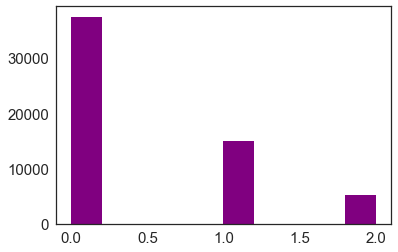

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(clusters)

#### Identify top five closest documents to each centroid

In [47]:

Centroid = kmeans3.transform(song_df)
for i in range(Centroid.shape[1]):
    temp = np.array(Centroid[:,i])
    index_val = np.argsort(temp)[:5]
    print("----------------------------------------------------------------")
    print("Cluster: %d"%i)
    print(songData.text.iloc[index_val],"\n")

----------------------------------------------------------------
Cluster: 0
(4540     Know you've been hurt by someone else  \nI can...
13907    Some people get up at the break of day  \nGott...
27707    Hey there boy did ya happen to know  \nWhereve...
17260    Another morning, another day in your life  \nW...
26338    Told me baby  \nYou were just too tired to try...
Name: text, dtype: object, '\n')
----------------------------------------------------------------
Cluster: 1
(5342     You say you want everything good for me,  \nBu...
33148    Baby baby baby  \nI've been lookin' at you loo...
26445    My friends say you're so into me  \nAnd that y...
41875    (JADE)  \nDaddy doesn't think  \nThat you'll b...
41818    I look at you  \nYou look at me  \n(You can't ...
Name: text, dtype: object, '\n')
----------------------------------------------------------------
Cluster: 2
(27550    I know why you want love in the middle of the ...
12310    It's so hard to be someone,  \nIt's so hard t

#### Analysis:
A. We can observe that most of the data points or observations belong to the first cluster [Cluster 0]. Further, the third cluster has the least number of observations.  
B. Since the number of clusters are very less, there is a huge disproportion in distribution of data-points to different cluster regions.

### 3. Dimensionality Reduction (to 50 components)

#### Reduce Dimension to 50 components using LSA

In [49]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(50)
song_df50 = lsa.fit_transform(song_df)
print(song_df50.shape)
lsa.components_.shape

(57650, 50)


(50, 22557)

#### Identify the top five features per component on Lower Dimension data

In [50]:
words = np.array(vect.get_feature_names())
for i in range(song_df50.shape[1]):
    s_order = np.abs(lsa.components_[i]).argsort()[::-1]
    print("----------------------------------------------------------------")
    print("Component:",i)
    print(words[s_order[:5]])

----------------------------------------------------------------
('Component:', 0)
[u'love' u'don' u'know' u'll' u'just']
----------------------------------------------------------------
('Component:', 1)
[u'love' u'don' u'got' u'heart' u'gonna']
----------------------------------------------------------------
('Component:', 2)
[u'oh' u'baby' u'yeah' u'll' u'time']
----------------------------------------------------------------
('Component:', 3)
[u'oh' u'don' u'want' u'baby' u'know']
----------------------------------------------------------------
('Component:', 4)
[u'baby' u'don' u'oh' u'want' u'know']
----------------------------------------------------------------
('Component:', 5)
[u'll' u'la' u'baby' u'got' u'yeah']
----------------------------------------------------------------
('Component:', 6)
[u'la' u'll' u'got' u'baby' u'yeah']
----------------------------------------------------------------
('Component:', 7)
[u'want' u'don' u'yeah' u'know' u've']
--------------------------

#### Analysis: 
A.  We can see that, most of the components have the features “love”, “heart”, “feel” and similar features. With this we can say that most of the songs are either romantic in nature or belongs to the topic “love”. 

B.  Another interesting feature is that we come across features like “rock”, “roll”, “night” in many of the components. With this we can conclude that most of the songs are played in party kind of set-up. 

### 4. K-Means Clustering - Multiple clusters


#### Perform K-Means clustering for 2 to 11 clusters

In [51]:
vect1 = TfidfVectorizer(min_df = 30, stop_words = 'english')
temp2 = vect1.fit_transform(songData.text)

lsa = TruncatedSVD(100)
song_df50 = lsa.fit_transform(temp2)
inertia = []

start = time.time()


for i in range(2, 11):
    kmeans2_11 = KMeans(i, n_jobs = 1)
    kmeans2_11.fit_predict(song_df50)
    inertia.append(kmeans2_11.inertia_)
    
print(inertia)
start = (time.time() - start) / 60    
print "100% complete and ", round(start, 2), "Minutes taken" 

[11811.127102812097, 11573.386103641897, 11392.341550018542, 11190.470134793899, 11070.048125710953, 10963.279092537696, 10800.725088753466, 10649.554031677653, 10573.858348469641]
100% complete and  1.66 Minutes taken


#### Identify the best number of clusters using the Elbow Method

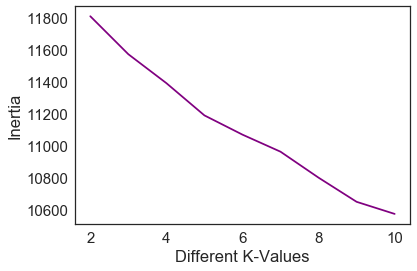

In [52]:
%matplotlib inline

plt.xlabel("Different K-Values")
plt.ylabel("Inertia")
plt.plot(range(2,11),inertia)

### 5. Using the best number of clusters

#### Identify top five closest documents to each cluster’s centroid (for the newly identified best number of clusters) 

In [54]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(5,n_jobs=1,n_init=5)
clusters5 = kmeans5.fit_predict(song_df50)
dist1 = kmeans5.transform(song_df50)
for i in range(dist1.shape[1]):
    temp1 = np.array(dist1[:,i])
    index_val1 = np.argsort(temp1)[:5]
    print("----------------------------------------------------------------")
    print("Cluster: %d"%i)
    print(songData.text.iloc[index_val1],"\n")


----------------------------------------------------------------
Cluster: 0
(32662    Can you blow my whistle baby, whistle baby  \n...
23409    House of fire  \nHouse of fire, yeah  \nLet's ...
52239    Way down in Alabama  \nThere's a girl just a w...
1990     I wanna see you move  \nCan you turn me up a l...
7019     Make pretend like in the movies  \nAnd do anot...
Name: text, dtype: object, '\n')
----------------------------------------------------------------
Cluster: 1
(8546     The sun rises and sets on time every day of th...
21263    Things just haven't been the same  \nSince the...
848      I'm a shark, I'm a shark,  \nA killer of the o...
26187    No apology (no apology)  \nWe will not back do...
36359    (ian hunter)  \n  \n(transcribed by colin ford...
Name: text, dtype: object, '\n')
----------------------------------------------------------------
Cluster: 2
(49916    Oh, carry home my broken bones and lay me down...
26594    Hey little girl is your daddy home?  \nDid he

#### Analysis: 

A. The best number of clusters we have found through the elbow method is 5.

B. We can observe that the documents are more spread out when the number of clusters = 5.

### 6. Dimensionality Reduction (to 2 components)

#### Reduce Dimension to 2 components using LSA

In [55]:
lsa2 = TruncatedSVD(2)
song_df2 = lsa2.fit_transform(song_df)
song_df2.shape

(57650, 2)

#### K-Means Clustering with 3 clusters on Lower Dimension

In [56]:
kmeans3 = KMeans(3)
kmeans3_lsa = kmeans3.fit_predict(song_df2)

#### Scatterplot to visualize the distribution of data points across the clusters

Text(0.5,1,u'Two Dimensions and Three Clusters')

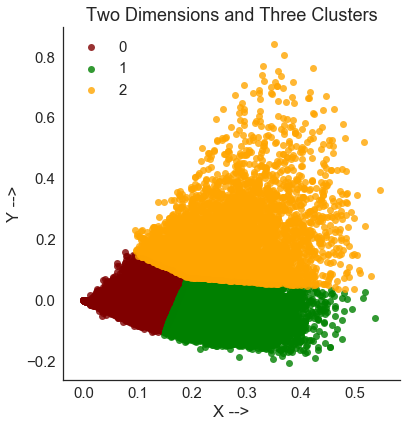

In [72]:
import seaborn as sb

sb.set(font_scale=1.5)
sb.set_style('white')
customPalette = ['Maroon', 'Green', 'Orange']
sb.set_palette(customPalette)

plot_df = pd.concat([pd.DataFrame(song_df2,columns=["X -->","Y -->"]),pd.DataFrame(kmeans3_lsa,columns=["Legends"])],axis=1)
facet = sb.lmplot(data=plot_df, x='X -->', y='Y -->', hue='Legends', 
                   fit_reg=False, legend=False, legend_out=True,size = 6)
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_title("Two Dimensions and Three Clusters")
